## Mobile Phone Price Analysis: 

### Project Overview  
This project analyzes a comprehensive **Mobile Phone Price Dataset** to uncover insights into pricing, features, and brand performance. Using advanced data analysis and visualization techniques, we explore the relationships between specifications like RAM, storage, battery capacity, and screen size, alongside pricing and brand reputation.  

### Objectives  
- **Data Cleaning & Preprocessing**: Prepare the dataset for accurate and efficient analysis.  
- **Exploratory Data Analysis (EDA)**: Identify trends, correlations, and key drivers of price.  
- **Feature Analysis**: Explore how phone specifications influence price and brand preferences.  
- **Visualizations**: Develop clear, intuitive charts and graphs to present insights.  
- **Trend Analysis**: Examine the top-performing brands and their evolution in the market. 

### Tools & Technologies  
- **Pandas**: Data manipulation and transformation.
- **Matplotlib** & **Seaborn**: Create professional visualizations.

### Acknowledgements  
We extend our gratitude to *Kaggle* for providing the **Mobile Phone Price Dataset**, which serves as the backbone for this analysis.  

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Mobile phone price Dataset
df = pd.read_csv('path')
df.head(2)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199


In [4]:
print('Number of Rows and Columns:',df.shape)
print('Number of Elements:',df.size)

Number of Rows and Columns: (407, 8)
Number of Elements: 3256


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


We noticed that the dataset is not clean, as several numeric columns are incorrectly categorized as object data types.

In [6]:
# Checking for Null values or the data not available
print(df.isnull().sum())

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64


Since there are no null values, dropping rows is unnecessary.

### DATA CLEANING

In [7]:
df.columns = df.columns.str.strip()
columns_to_clean = ['Storage', 'RAM', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Price ($)']

# Function to convert numeric values
def clean_numeric(value):
    return pd.to_numeric(''.join(c if c.isdigit() or c == '.' else '' for c in str(value)), errors='coerce')
# 'coerce' coverts values to NaN in case of invalid values that cannot be converted to numbers

def format_camera(value):
    return '+'.join(part.strip() for part in str(value).split('+'))

if 'Camera (MP)' in df.columns:
    df['Camera (MP)'] = df['Camera (MP)'].apply(format_camera)

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric)

# Drop rows with missing values ONLY in the cleaned numeric columns
df = df.dropna(subset=columns_to_clean)

for col in columns_to_clean:
    df[col] = df[col].astype(float)

df.to_csv('cleaned_mobile_price_data.csv', index=False)

df.head(2)


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128.0,6.0,6.1,12+12+12,3095.0,999.0
1,Samsung,Galaxy S21 Ultra,256.0,12.0,6.8,108+10+10+12,5000.0,1199.0


In [8]:
df.info() # Now the clean data info shows numeric values data type to be float
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   406 non-null    object 
 1   Model                   406 non-null    object 
 2   Storage                 406 non-null    float64
 3   RAM                     406 non-null    float64
 4   Screen Size (inches)    406 non-null    float64
 5   Camera (MP)             406 non-null    object 
 6   Battery Capacity (mAh)  406 non-null    float64
 7   Price ($)               406 non-null    float64
dtypes: float64(5), object(3)
memory usage: 28.5+ KB


,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($)
count,406.000000,406.000000,406.000000,406.000000,406.000000
mean,122.719212,5.832512,6.470443,4678.142857,406.859606
std,64.706097,2.432603,0.320521,797.467420,298.611937
min,32.000000,2.000000,4.500000,1821.000000,99.000000
25%,64.000000,4.000000,6.440000,4300.000000,199.000000
50%,128.000000,6.000000,6.500000,5000.000000,299.000000
75%,128.000000,8.000000,6.580000,5000.000000,499.000000
max,512.000000,16.000000,7.600000,7000.000000,1999.000000


In [9]:
print('\nNumber of Rows and Columns:',df.shape)
print('Number of Elements:',df.size)


Number of Rows and Columns: (406, 8)
Number of Elements: 3248


In [10]:
# Removing duplicate rows
df = df.drop_duplicates()
print('Number of Rows and Columns:',df.shape)
print('Number of Elements:',df.size)

Number of Rows and Columns: (373, 8)
Number of Elements: 2984


In [11]:
df.nunique()

Brand                      16
Model                     238
Storage                     5
RAM                         8
Screen Size (inches)       40
Camera (MP)               124
Battery Capacity (mAh)     48
Price ($)                  57
dtype: int64

In [12]:
df.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

### DATA VISUALIZATION


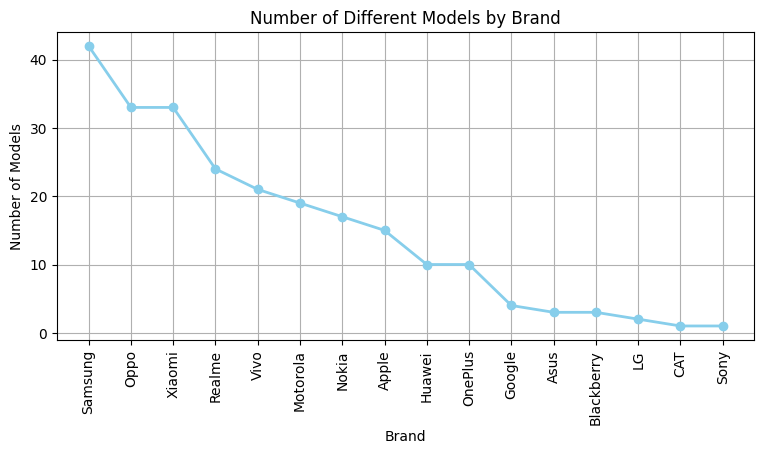

In [13]:
models_by_brand = df.groupby('Brand')['Model'].nunique()
sorted_brands = models_by_brand.sort_values(ascending=False)
plt.figure(figsize=(9, 4))
sorted_brands.plot(kind='line', marker='o', color='skyblue', linewidth=2)
plt.title('Number of Different Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(ticks=range(len(sorted_brands)), labels=sorted_brands.index, rotation=90)
plt.grid(True)
plt.show()


- The line chart illustrates which brand offers a greater variety of models.

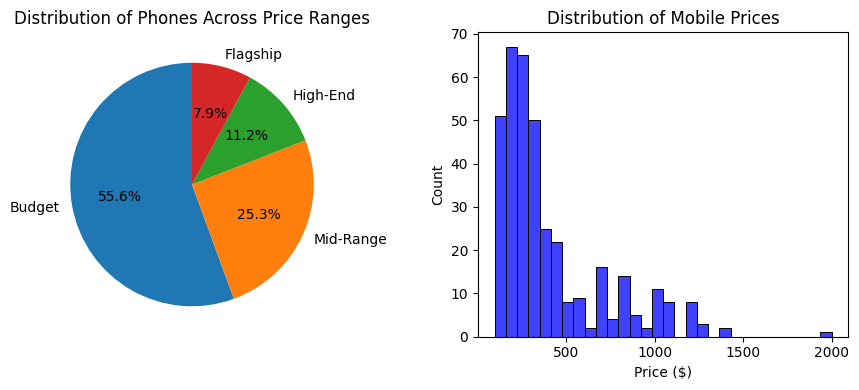

In [14]:
bins = [0, 300, 600, 900, 1200]
labels = ['Budget', 'Mid-Range', 'High-End', 'Flagship']
df['Price Range'] = pd.cut(df['Price ($)'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
price_range_counts = df['Price Range'].value_counts()
plt.pie(
    price_range_counts,
    labels=price_range_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Phones Across Price Ranges')
plt.subplot(1, 2, 2)
sns.histplot(df['Price ($)'], color='blue', bins=30)
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The histogram of mobile phone prices shows that the majority of mobile phones are priced around $250.
- 55% of phones fall under the Budget category, making it the largest segment.

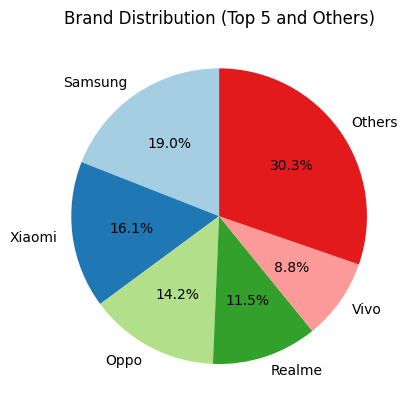

In [27]:
brand_counts = df['Brand'].value_counts()
top_brands = brand_counts.head(5)
other_brands = brand_counts.tail(brand_counts.shape[0] - 5).sum()
brand_counts_top_others = pd.concat([top_brands, pd.Series({'Others': other_brands})])
plt.pie(brand_counts_top_others, labels=brand_counts_top_others.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Brand Distribution (Top 5 and Others)')
plt.show()

- The Pie Chart reveals that the top 5 brands dominate 70% of the market.

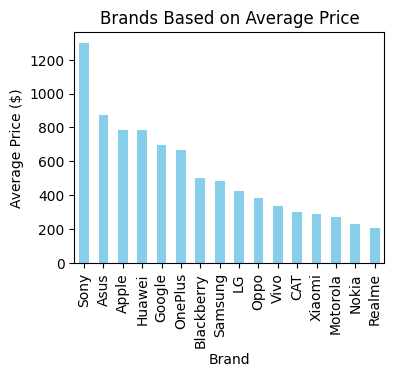

In [16]:
top_brands = df.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)
plt.figure(figsize=(4, 3))
top_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.title('Brands Based on Average Price')
plt.show()

- The bar chart shows average mobile prices by brand, helping customers identify premium options and make budget-conscious decisions.

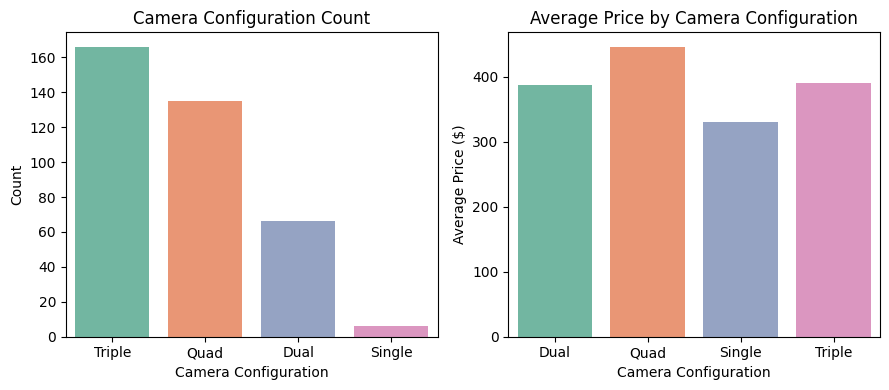

In [ ]:
def camera_count(camera_string):
    return len(camera_string.split('+'))

df['Camera Count'] = df['Camera (MP)'].apply(camera_count)

camera_categories = {1: 'Single', 2: 'Dual', 3: 'Triple', 4: 'Quad'}
df['Camera Category'] = df['Camera Count'].map(camera_categories)

avg_price_by_camera = df.groupby('Camera Category')['Price ($)'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.countplot(x='Camera Category', data=df, hue='Camera Category', palette='Set2', ax=axes[0])
axes[0].set_title('Camera Configuration Count')
axes[0].set_xlabel('Camera Configuration')
axes[0].set_ylabel('Count')

sns.barplot(x='Camera Category', y='Price ($)', data=avg_price_by_camera, hue='Camera Category', palette='Set2', ax=axes[1])
axes[1].set_title('Average Price by Camera Configuration')
axes[1].set_xlabel('Camera Configuration')
axes[1].set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

- Mobiles with a triple-camera setup have the highest count.
- Mobiles with a quad-camera configuration have the highest average price.

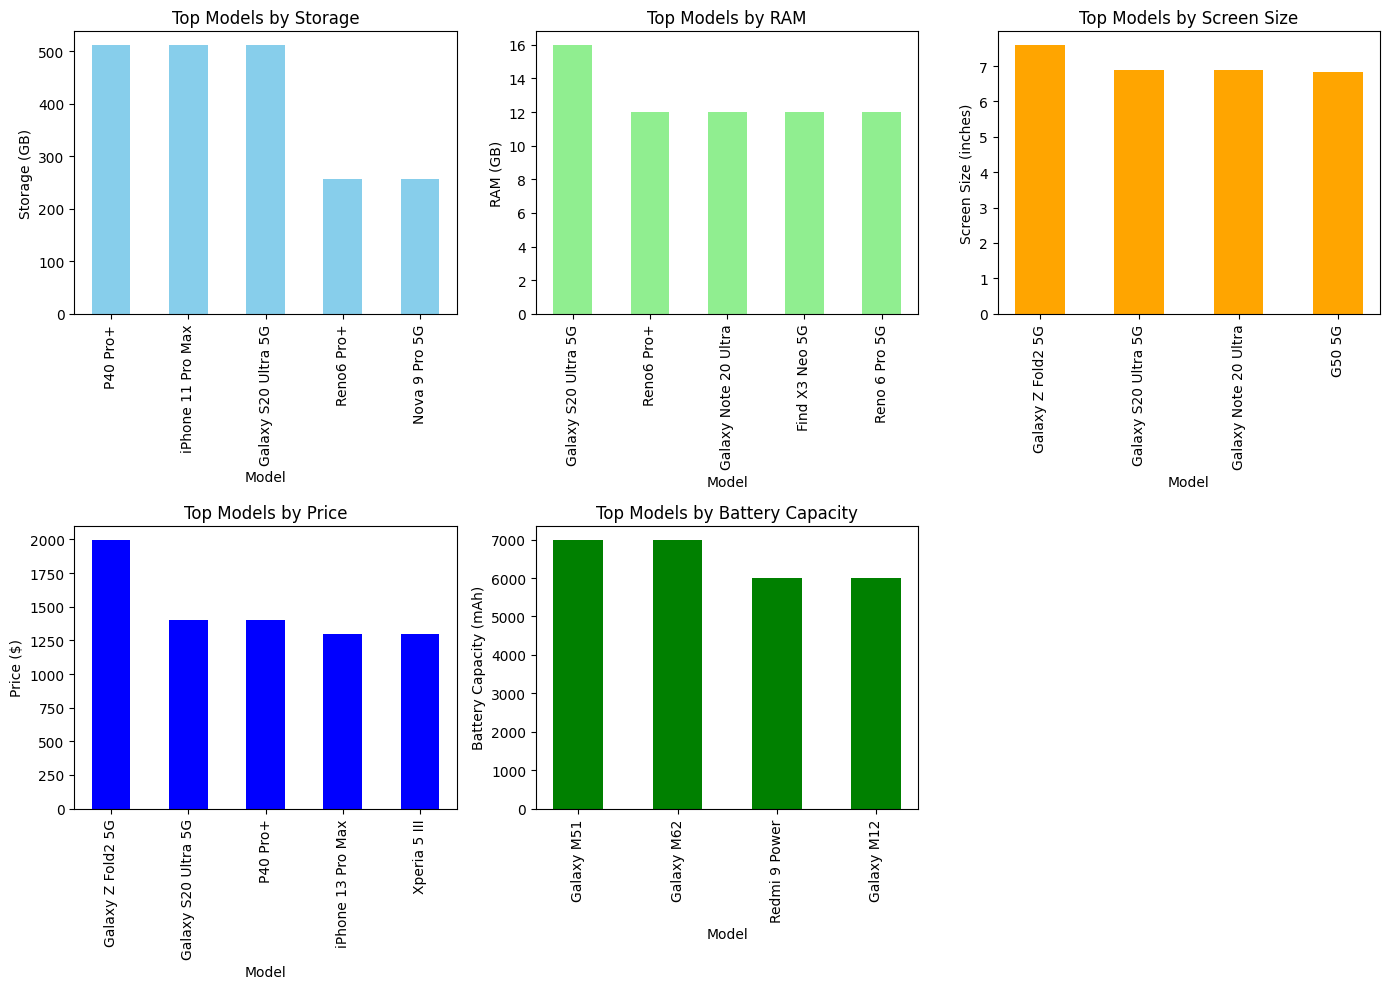

In [34]:
# Top 5 Models Based on Different Metrics
top_storage_models = df[['Model', 'Storage']].sort_values(by='Storage', ascending=False).head(5)
top_ram_models = df[['Model', 'RAM']].sort_values(by='RAM', ascending=False).head(5)
top_screen_models = df[['Model', 'Screen Size (inches)']].sort_values(by='Screen Size (inches)', ascending=False).head(5)

plt.figure(figsize=(14,10))

plt.subplot(2, 3, 1)
plt.bar(top_storage_models['Model'], top_storage_models['Storage'], color='skyblue', width=0.5)
plt.title('Top Models by Storage')
plt.xlabel('Model')
plt.ylabel('Storage (GB)')
plt.xticks(rotation=90)

plt.subplot(2, 3, 2)
plt.bar(top_ram_models['Model'], top_ram_models['RAM'], color='lightgreen', width=0.5)
plt.title('Top Models by RAM')
plt.xlabel('Model')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=90)

plt.subplot(2, 3, 3)
plt.bar(top_screen_models['Model'], top_screen_models['Screen Size (inches)'], color='orange', width=0.5)
plt.title('Top Models by Screen Size')
plt.xlabel('Model')
plt.ylabel('Screen Size (inches)')
plt.xticks(rotation=90)

top_price_models = df[['Model', 'Price ($)']].sort_values(by='Price ($)', ascending=False).head(5)
top_battery_models = df[['Model', 'Battery Capacity (mAh)']].sort_values(by='Battery Capacity (mAh)', ascending=False).head(5)

plt.subplot(2, 3, 4)
plt.bar(top_price_models['Model'], top_price_models['Price ($)'], color='blue', width=0.5)
plt.title('Top Models by Price')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)

plt.subplot(2, 3, 5)
plt.bar(top_battery_models['Model'], top_battery_models['Battery Capacity (mAh)'], color='green', width=0.5)
plt.title('Top Models by Battery Capacity')
plt.xlabel('Model')
plt.ylabel('Battery Capacity (mAh)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


- These charts offer a comprehensive view of mobile phones based on important factors, aiding customers in making informed decisions according to their preferences.
- For instance, it is observed that the 'Galaxy S20 Ultra 5G' excels in storage, RAM, and screen size, but it falls under the high price range and is not among the top models for battery capacity.

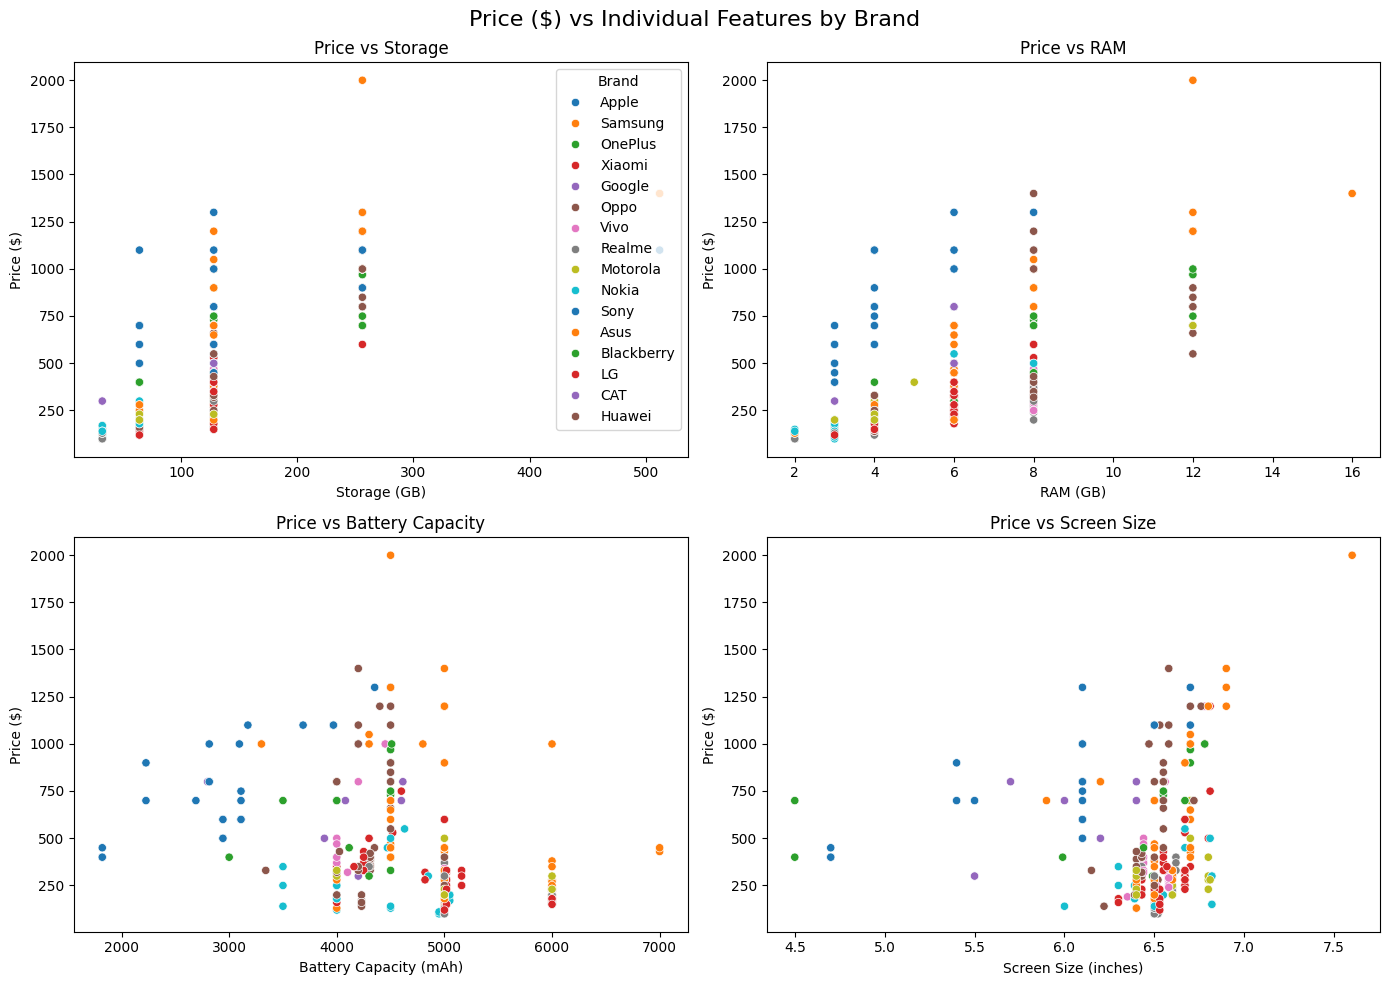

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Price ($) vs Individual Features by Brand', fontsize=16)

sns.scatterplot(x='Storage', y='Price ($)', hue='Brand', data=df, palette='tab10', ax=axes[0, 0])
axes[0, 0].set_title('Price vs Storage')
axes[0, 0].set_xlabel('Storage (GB)')
axes[0, 0].set_ylabel('Price ($)')

sns.scatterplot(x='RAM', y='Price ($)', hue='Brand', data=df, palette='tab10', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Price vs RAM')
axes[0, 1].set_xlabel('RAM (GB)')
axes[0, 1].set_ylabel('Price ($)')

sns.scatterplot(x='Battery Capacity (mAh)', y='Price ($)', hue='Brand', data=df, palette='tab10', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Price vs Battery Capacity')
axes[1, 0].set_xlabel('Battery Capacity (mAh)')
axes[1, 0].set_ylabel('Price ($)')

sns.scatterplot(x='Screen Size (inches)', y='Price ($)', hue='Brand', data=df, palette='tab10', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Price vs Screen Size')
axes[1, 1].set_xlabel('Screen Size (inches)')
axes[1, 1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

- **Price vs Storage:** The scatter plot shows that as storage increases, the price generally rises, with Apple having models at higher price points. Brands like Samsung, Xiaomi, and OnePlus show a wide range of prices and storage capacities, while budget-friendly models appear from brands like Motorola and Nokia.
- **Price vs RAM:** The plot shows a positive correlation between RAM size and price, with most devices having 4GB to 8GB of RAM in the mid-price range. Outliers, like Apple and Xiaomi, feature higher RAM (12GB+) with premium prices.
- **Price vs Battery Capacity:** The scatter plot shows a general trend where phones with higher battery capacities tend to have higher prices, but there are also exceptions. Many phones with mid-range battery capacities are spread across a wide price range, suggesting other factors influence pricing.
- **Price vs Screen Size** The scatter plot shows most phones with prices between $250 and $1000, with screen sizes around 6.0 to 6.5 inches. A few high-price outliers are seen with larger screen sizes above 7 inches.

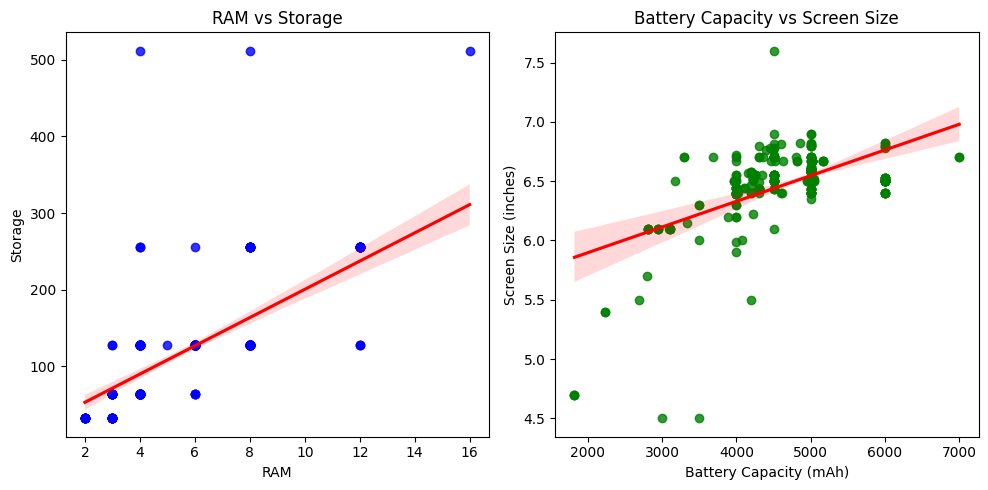

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='RAM', y='Storage', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('RAM vs Storage')
plt.xlabel('RAM')
plt.ylabel('Storage')

plt.subplot(1, 2, 2)
sns.regplot(x='Battery Capacity (mAh)', y='Screen Size (inches)', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Battery Capacity vs Screen Size')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Screen Size (inches)')

plt.tight_layout()
plt.show()

- **RAM vs Storage:** Higher RAM is generally associated with larger storage, though a few outliers exist with high storage and low RAM.  

- **Battery Capacity vs Screen Size:** Larger screen sizes tend to have higher battery capacities, showing a positive linear trend.

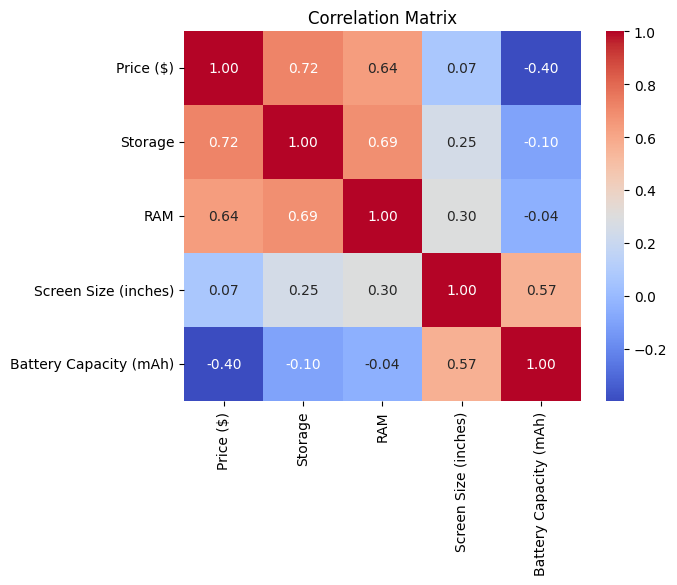

In [21]:
corr_matrix = df[['Price ($)', 'Storage', 'RAM', 'Screen Size (inches)', 'Battery Capacity (mAh)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

- *Price* has a strong positive correlation with *Storage* (0.72) and *RAM* (0.64), but a negative correlation with *Battery Capacity* (-0.40).  
- *Screen Size* shows moderate correlation with *Battery Capacity* (0.57) but weak correlation with *Price* (0.07).  
- *Storage* and *RAM* are positively correlated (0.69), indicating their interdependence.

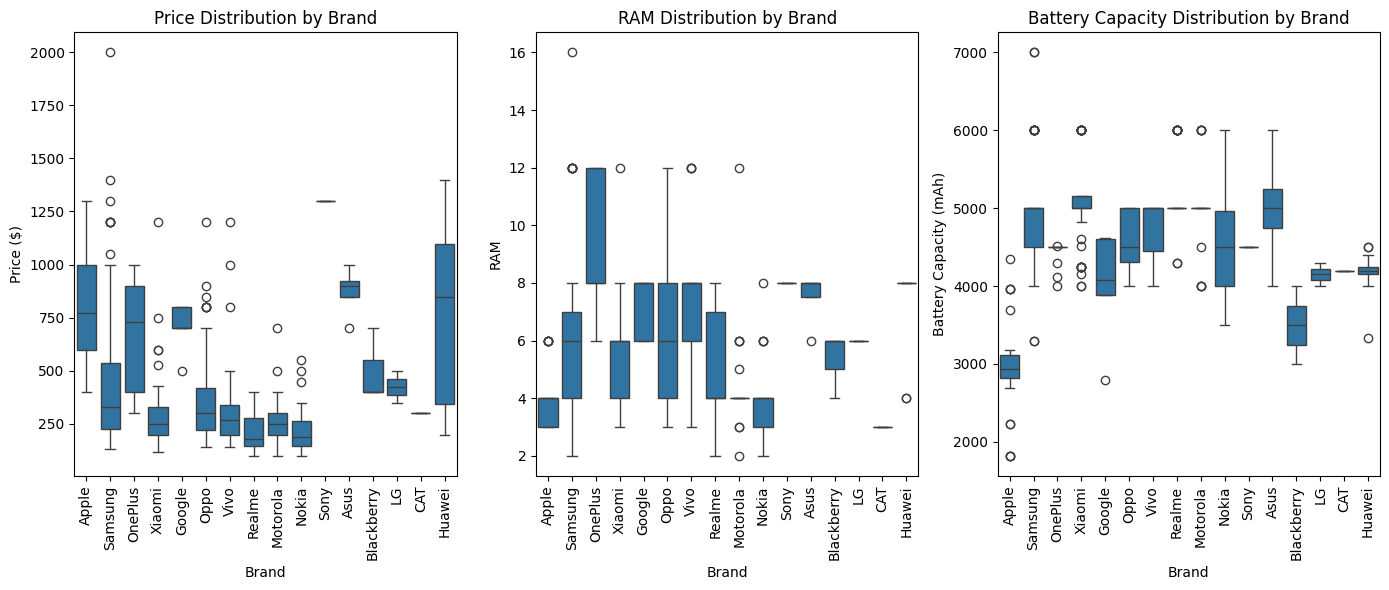

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Brand', y='Price ($)', data=df)
plt.title('Price Distribution by Brand')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.boxplot(x='Brand', y='RAM', data=df)
plt.title('RAM Distribution by Brand')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.boxplot(x='Brand', y='Battery Capacity (mAh)', data=df)
plt.title('Battery Capacity Distribution by Brand')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

1. **Price Distribution**: Apple has the highest median price with a wide range, while Xiaomi, Realme, and Motorola have the lowest-priced devices. Samsung and Huawei also feature premium-priced devices.  
2. **RAM Distribution**: OnePlus and Samsung offer devices with the highest RAM (up to 16 GB), while Apple and brands like Nokia and Blackberry show lower RAM capacities.  
3. **Battery Capacity Distribution**: Sony, CAT, and Asus lead with higher battery capacities (~5000 mAh+), while Apple lags behind with lower capacities (~3000 mAh). Most other brands cluster around *4000–5000 mAh*.

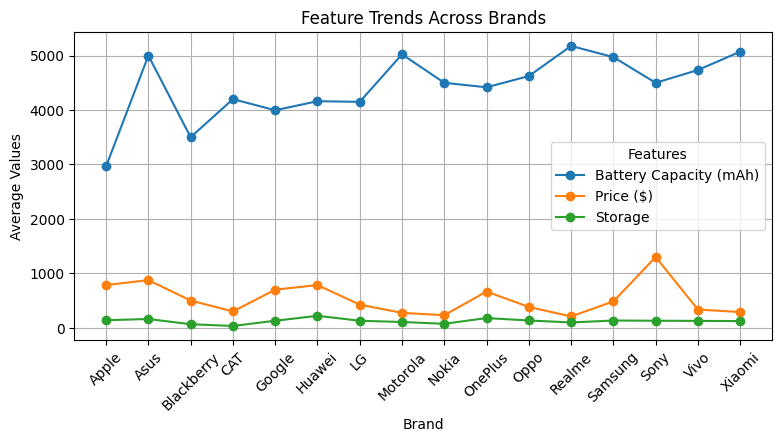

In [23]:
numerical_columns = ['Battery Capacity (mAh)', 'Price ($)', 'Storage']
feature_trends = df.groupby('Brand')[numerical_columns].mean().reset_index()

plt.figure(figsize=(9, 4))
for column in numerical_columns:
    plt.plot(feature_trends['Brand'], feature_trends[column], marker='o', label=column)

plt.title('Feature Trends Across Brands')
plt.xlabel('Brand')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.grid(True)
plt.show()

- The fluctuation of average prices is observed across brands, corresponding to variations in storage and battery capacity. This highlights the relationship between these features and pricing trends. Visualizing these trends offers insights into how different brands balance their features and pricing strategies.

## Conclusion

1. **Brand Analysis**:
   - Samsung offers the highest variety of models, followed by Realme and Xiaomi, while Sony has the least variety.
   - The 5 brands that dominate 70% of the market are: Samsung, Xiaomi, Oppo, Realme, and Vivo.

2. **Price Distribution**:
   - The majority of mobile phones are priced around $250.
   - 55% of phones fall under the Budget category, priced below $300.
   - 25% of the phones are in the mid-range category, while the rest fall into the high-priced range.

3. **Camera Setup**:
   - Mobiles with a triple-camera setup have the highest count.
   - Mobiles with a quad-camera configuration have the highest average price.

4. **Customer Insights**:
   - Various charts offer a comprehensive view of mobile phones based on important factors, aiding customers in making informed decisions according to their preferences.
   - The 'Galaxy S20 Ultra 5G' excels in storage, RAM, and screen size but falls under the high price range and is not among the top models for battery capacity.

5. **Price vs Features**:
   - **Price vs Storage**: The scatter plot shows that as storage increases, the price generally rises. Apple models are at higher price points, while brands like Samsung, Xiaomi, and OnePlus show a wide range of prices and storage capacities. Budget-friendly models come from brands like Motorola and Nokia.
   - **Price vs RAM**: There is a positive correlation between RAM size and price. Most devices have 4GB to 8GB of RAM in the mid-price range, while premium models like Apple and Xiaomi feature higher RAM (12GB+) with higher prices.
   - **Price vs Battery Capacity**: Phones with higher battery capacities tend to have higher prices, though exceptions exist. Many phones with mid-range battery capacities are spread across a wide price range, suggesting that other factors influence pricing.
   - **Price vs Screen Size**: The majority of phones are priced between $250 and $1000, with screen sizes around 6.0 to 6.5 inches. A few high-priced outliers feature larger screen sizes above 7 inches.

6. **Correlations**:
   - **Price vs Storage**: There is a strong positive correlation (0.72) between price and storage.
   - **Price vs RAM**: Price has a positive correlation with RAM (0.64), indicating that higher RAM models are generally priced higher.
   - **Price vs Battery Capacity**: There is a negative correlation between price and battery capacity (-0.40), suggesting that larger battery capacities don't necessarily equate to higher prices.
   - **Screen Size vs Battery Capacity**: A positive linear trend is observed, with larger screen sizes generally having higher battery capacities (0.57 correlation).
   - **Storage vs RAM**: Storage and RAM are positively correlated (0.69), showing their interdependence.

7. **Brand-Specific Distributions**:
   - **Price Distribution**: Apple has the highest median price with a wide range, while Xiaomi, Realme, and Motorola offer the lowest-priced devices. Samsung and Huawei also feature premium-priced devices.
   - **RAM Distribution**: OnePlus and Samsung offer devices with the highest RAM (up to 16 GB), while Apple and brands like Nokia and Blackberry offer lower RAM capacities.
   - **Battery Capacity Distribution**: Sony, CAT, and Asus lead with higher battery capacities (~5000 mAh+), while Apple lags behind with lower capacities (~3000 mAh). Most other brands cluster around 4000–5000 mAh.
